# ***HOUSE PRICE PREDICTION MODEL***

Metadata of features:

1)cid: Notation for a house. Will not of our use. So we will drop this column

2)dayhours: Represents Date, when house was sold. 

3)price: It's our TARGET feature, that we have to predict based on other featues

4)room_bed: Represents number of bedrooms in a house 

5)room_bath: Represents number of bathrooms

6)living_measure: Represents square footage of house 

7)lot_measure: Represents square footage of lot

8)ceil: Represents number of floors in house

9)coast: Represents whether house has waterfront view. It seems to be a categorical variable. We will see in our further data analysis

10)sight: Represents how many times sight has been viewed.

11)condition: Represents the overall condition of the house. It's kind of rating given to the house.

12)quality: Represents grade given to the house based on grading system

13)ceil_measure: Represents square footage of house apart from basement

14)basement: Represents square footage of basement

15)yr_built: Represents the year when house was built

16)yr_renovated: Represents the year when house was last renovated

17)zipcode: Represents zipcode as name implies

18)lat: Represents Lattitude co-ordniates

19)long: Represents Longitude co-ordinates

20)living_measure15: Represents square footage of house, when measured in 2015 year as house area may or may not changed after renovation if any happened

21)lot_measure15: Represents square footage of lot, when measured in 2015 year as lot area may or may not change after renovation if any done

22)furnished: Tells whether house is furnished or not. It seems to be categorical variable as description implies

23)total_area: Represents total area i.e. area of both living and lot.


In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.subplots as sp
import matplotlib.pyplot as plt
#!pip install geopandas
#!pip install contextily
import contextily as ctx
import geopandas as gpd
import seaborn as sns
from scipy.stats import mstats
from datetime import datetime
import copy as cp
#from IPython.display import display, HTML
import string
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score


### Exploring Data

In [2]:
#Read raw excel file
df = pd.read_excel("innercity.xlsx")

In [3]:
#Top 5 record view for all the features
df.head().transpose()

,0,1,2,3,4
cid,3876100940,3145600250,7129303070,7338220280,7950300670
dayhours,20150427T000000,20150317T000000,20140820T000000,20141010T000000,20150218T000000
price,600000,190000,735000,257000,450000
room_bed,4.0,2.0,4.0,3.0,2.0
room_bath,1.75,1.0,2.75,2.5,1.0
living_measure,3050.0,670.0,3040.0,1740.0,1120.0
lot_measure,9440.0,3101.0,2415.0,3721.0,4590.0
ceil,1,1,2,2,1
coast,0,0,1,0,0
sight,0.0,0.0,4.0,0.0,0.0


In [4]:
#There are total 21613 rows of records with 23 features.
df.shape

(21613, 23)

In [5]:
#Getting the five point and other categorical relevant features summary.
#We observe some records decline in few features suggesting null values presence.
#Besides there are few features which have vast difference between min and max value suggesting scaling
#them would give better results as even the float number features' data
#seem to have gap between mean and median suggesting those not following normal distribution.
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cid,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312048,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
dayhours,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540182.158793,367362.231718,75000.0,321950.0,450000.0,645000.0,7700000.0
room_bed,21505.0,NaN,NaN,NaN,3.371355,0.930289,0.0,3.0,3.0,4.0,33.0
room_bath,21505.0,NaN,NaN,NaN,2.115171,0.770248,0.0,1.75,2.25,2.5,8.0
living_measure,21596.0,NaN,NaN,NaN,2079.860761,918.496121,290.0,1429.25,1910.0,2550.0,13540.0
lot_measure,21571.0,NaN,NaN,NaN,15104.583283,41423.619385,520.0,5040.0,7618.0,10684.5,1651359.0
ceil,21571.0,7.0,1.0,10647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coast,21612.0,3.0,0.0,21421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sight,21556.0,NaN,NaN,NaN,0.234366,0.766438,0.0,0.0,0.0,0.0,4.0


In [6]:
#CID: House ID/Property ID.Not used for analysis
#Dayhours: Since this reflects time a/t metadata, dtype needs to be changed
#price: Our taget column value is in 75k - 7700k range. As Mean > Median, it's Right-Skewed.
#room_bed: Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's slightly Right-Skewed.
#room_bath: Number of bathrooms range from 0 - 8. As Mean slightly < Median, it's slightly Left-Skewed.
#living_measure: Square footage of house range from 290 - 13,540. As Mean > Median, it's Right-Skewed.
#lot_measure: Square footage of lot range from 520 - 16,51,359. As Mean almost double of Median, it's Hightly Right-Skewed.
#sight: Value ranges from 0 - 4. As Mean > Median, it's Right-Skewed
#quality: Representign grade given to house which range from 1 - 13. As Mean > Median, it's Right-Skewed.
#ceil_measure: Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's Right-Skewed.
#basement: Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's Highly Right-Skewed.
#yr_renovated: House renovation year only 2015. So this column can be used as Categorical Variable for knowing whether house is renovated or not.
#zipcode: House ZipCode ranges from 98001 - 98199. As Mean > Median, it's Right-Skewed.
#lat: Lattitude ranges from 47.1559 - 47.7776 As Mean < Median, it's Left-Skewed.
#living_measure15: Value ragnes from 399 to 6,210. As Mean > Median, it's Right-Skewed.
#lot_measure15: Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's Highly Right-Skewed.
#furnished: Representing whether house is furnished or not. It's a Categorical Variable

In [7]:
#Checking on null values.
#Clearly, we see 16 features have null value presence, out of which 3 are most concerning.
#This needs to be addressed. Let's further dig into data.
df.isnull().sum().sort_values(ascending=False)

living_measure15    166
room_bed            108
room_bath           108
sight                57
condition            57
lot_measure          42
ceil                 42
total_area           29
furnished            29
lot_measure15        29
living_measure       17
basement              1
yr_built              1
quality               1
ceil_measure          1
coast                 1
yr_renovated          0
zipcode               0
lat                   0
long                  0
dayhours              0
price                 0
cid                   0
dtype: int64

In [8]:
#Checking on the data types for each feature.
#Observing closely at the given data(df), I realised the object datatype feature seems to 
#actually have numerical value, then why its an object?
#Let's check these features further
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [9]:
#Rechecking object values to realise their actual datatype for easy datatype conversion
#Let's check further why these values are classified as objects.
df[['dayhours','ceil','coast','condition','yr_built','long','total_area']]

,dayhours,ceil,coast,condition,yr_built,long,total_area
0,20150427T000000,1,0,3,1966,-122.183,12490
1,20150317T000000,1,0,4,1948,-122.274,3771
2,20140820T000000,2,1,3,1966,-122.256,5455
3,20141010T000000,2,0,3,2009,-122.213,5461
4,20150218T000000,1,0,3,1924,-122.285,5710
...,...,...,...,...,...,...,...
21608,20150310T000000,2,0,3,1996,-121.962,63597
21609,20140521T000000,1,0,3,1939,-122.341,5871
21610,20140905T000000,2,0,3,1978,-122.04,38122
21611,20150206T000000,2,0,3,1997,-122.316,9360


In [10]:
##Below format helps displaying results parallely for easy view
#CSS = """
#.output {
#    flex-direction: row;
#}
#"""
#
#HTML('<style>{}</style>'.format(CSS))

In [11]:
#Checking individual unique counts for all the object realated columns.
#Realised all of these column have insignificant record by "$", 
#can't delete the records as it might lead to data loss so let's convert it to null and then impute it all together.

In [12]:
display(df.ceil.value_counts())
display(df.coast.value_counts())
display(df.condition.value_counts())

1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64

0    21421
1      161
$       30
Name: coast, dtype: int64

3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: condition, dtype: int64

In [13]:
display(df.yr_built.value_counts())
#display(df.long.value_counts())
display(df.long[df['long']=='$'].value_counts())
#display(df.total_area.value_counts())
display(df.total_area[df['total_area']=='$'].value_counts())

2014    559
2006    454
2005    450
2004    433
2003    421
       ... 
1901     29
1902     27
1935     24
1934     21
$        14
Name: yr_built, Length: 117, dtype: int64

$    34
Name: long, dtype: int64

$    39
Name: total_area, dtype: int64

In [14]:
#Let's not modify the original data, let's work with the copy of the data
data = df.copy()

In [15]:
# Drop the 'cid' column as it's not needed
data = data.drop(columns=['cid'])

In [16]:
#Columns that contains dollar signs ($) that has zero contribution we want to replace as null value using replace()
#as later we can deal with all the null values together.
data = data.replace('$', None)

In [17]:
data.shape

(21613, 22)

In [18]:
#We clearly observe the rise of null values in object datatype feature after replacement of '$' with null values
display(df.isnull().sum())
display(data.isnull().sum())

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

### Data Preprocessing

In [19]:
#Dealing with null values for features(room_bed, room_bath,living_measure,lot_measure, 
#ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, long, living_measure15, 
#lot_measure15, furnished, total_area)

#Single null valued rows can be removed as it will not make huge impact on the analysis so null value records of features 
#like quality,ceil_measure and basement can be removed.
data.dropna(subset=['quality','ceil_measure','basement'], inplace=True)

#For Numerical Features as per metadata and data like 
# (1) living_measure15, living_measure, total_area,lot_measure, lot_measure15, long, yr_built 
# we should go by Median imputation as the distribution seemed to be skewed as observed from the describe() function:
data['living_measure15'] = data['living_measure15'].fillna(data['living_measure15'].median())
data['living_measure'] = data['living_measure'].fillna(data['living_measure'].median())
data['total_area'] = data['total_area'].fillna(data['total_area'].median())
data['lot_measure'] = data['lot_measure'].fillna(data['lot_measure'].median())
data['lot_measure15'] = data['lot_measure15'].fillna(data['lot_measure15'].median())
data['long'] = data['long'].fillna(data['long'].median())
data['yr_built'] = data['yr_built'].fillna(data['yr_built'].median())


# (2) room_bed, room_bath, ceil: Given these are discrete numerical values often representing typical property attributes, 
# replacing missing values with the mode (the most frequently occurring value) would maintain the general distribution.
data['room_bed'] = data['room_bed'].fillna(data['room_bed'].mode().iloc[0])
data['room_bath'] = data['room_bath'].fillna(data['room_bath'].mode().iloc[0])
data['ceil'] = data['ceil'].fillna(data['ceil'].mode().iloc[0])

#For Categorical Features as per metadata and data like
#coast, furnished, condition, sight: These are categorical and would generally benefit from mode imputation 
#to keep the category distribution intact.
data['coast'] = data['coast'].fillna(data['coast'].mode().iloc[0])
data['furnished'] = data['furnished'].fillna(data['furnished'].mode().iloc[0])
data['condition'] = data['condition'].fillna(data['condition'].mode().iloc[0])
data['sight'] = data['sight'].fillna(data['sight'].mode().iloc[0])

#Checking on the modified data
print(data.shape)
print(data.isnull().sum())

(21612, 22)
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64


In [20]:
#Let's change the data type for the features as per metadata info and data view for easy analysis later
data['dayhours'] = pd.to_datetime(data["dayhours"]) #As per metadata, it represents date
data[['yr_built', 'coast', 'condition', 'total_area']] = data[['yr_built', 'coast', 'condition', 'total_area']].astype('int32')
data[['ceil','long']] = data[['ceil','long']].astype('float')

In [21]:
data.to_csv('cleaned_data.csv', index=False)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21612 non-null  datetime64[ns]
 1   price             21612 non-null  int64         
 2   room_bed          21612 non-null  float64       
 3   room_bath         21612 non-null  float64       
 4   living_measure    21612 non-null  float64       
 5   lot_measure       21612 non-null  float64       
 6   ceil              21612 non-null  float64       
 7   coast             21612 non-null  int32         
 8   sight             21612 non-null  float64       
 9   condition         21612 non-null  int32         
 10  quality           21612 non-null  float64       
 11  ceil_measure      21612 non-null  float64       
 12  basement          21612 non-null  float64       
 13  yr_built          21612 non-null  int32         
 14  yr_renovated      2161

In [23]:
#display(df.describe().transpose())
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21612.0,540191.999722,367367.882164,75000.0000,321837.500000,450000.0000,645000.000,7.700000e+06
room_bed,21612.0,3.369517,0.928349,0.0000,3.000000,3.0000,4.000,3.300000e+01
room_bath,21612.0,2.117088,0.768817,0.0000,1.750000,2.2500,2.500,8.000000e+00
living_measure,21612.0,2079.716500,918.167062,290.0000,1430.000000,1910.0000,2550.000,1.354000e+04
lot_measure,21612.0,15090.380529,41385.588927,520.0000,5043.000000,7618.0000,10660.250,1.651359e+06
ceil,21612.0,1.492504,0.539765,1.0000,1.000000,1.5000,2.000,3.500000e+00
coast,21612.0,0.007450,0.085991,0.0000,0.000000,0.0000,0.000,1.000000e+00
sight,21612.0,0.233759,0.765537,0.0000,0.000000,0.0000,0.000,4.000000e+00
condition,21612.0,3.407736,0.649942,1.0000,3.000000,3.0000,4.000,5.000000e+00
quality,21612.0,7.656857,1.175484,1.0000,7.000000,7.0000,8.000,1.300000e+01


### EDA

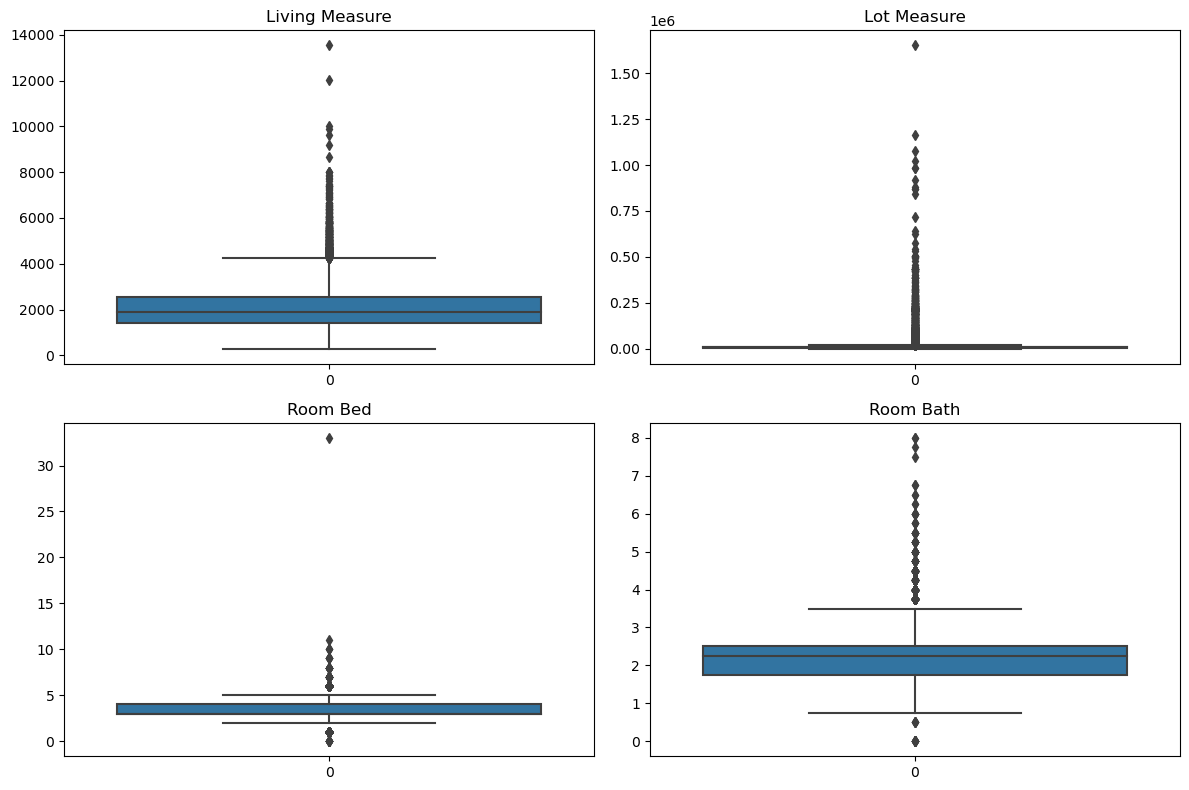

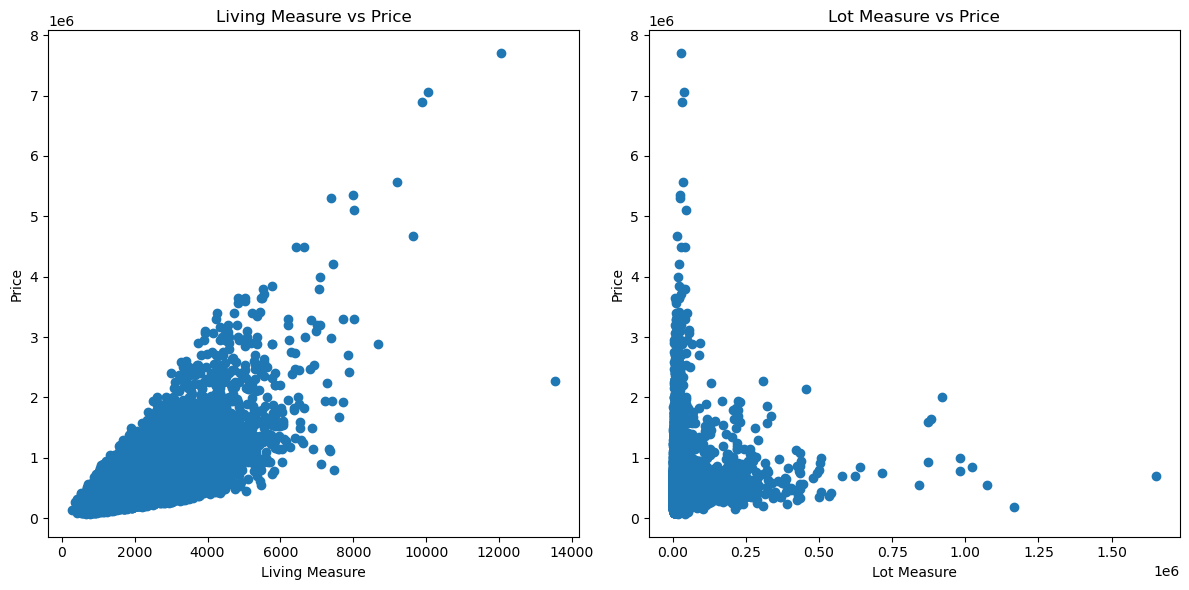

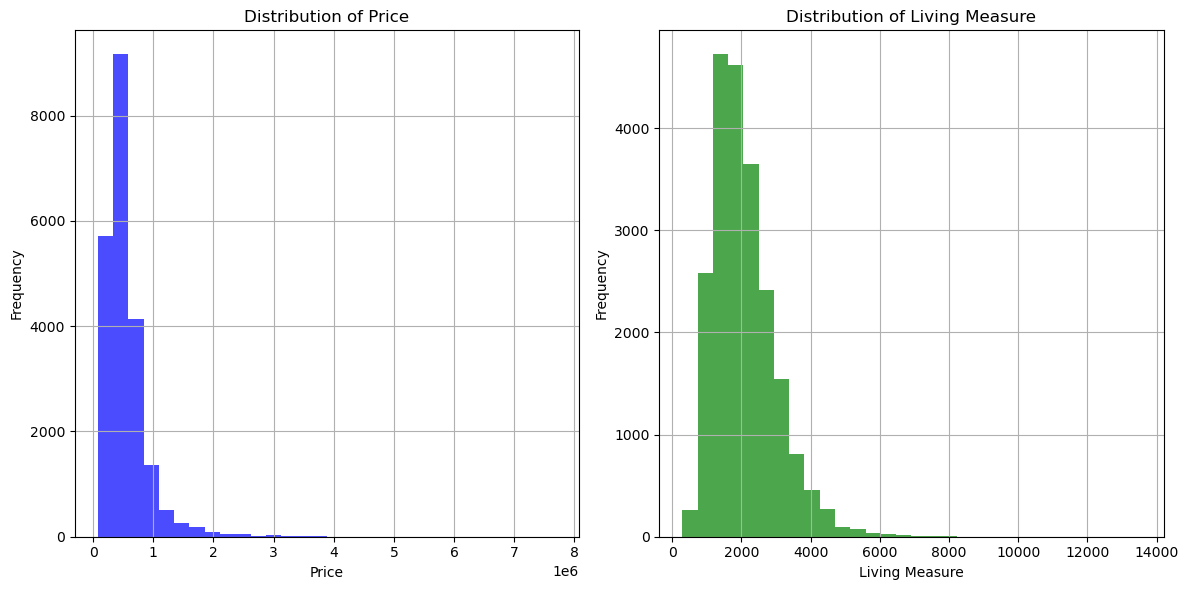

In [24]:
# Visualizing Outliers with Box Plots
#Feature Selection Rationale:
#Living Measure and Lot Measure: These features represent the size of the living area 
#and the lot, respectively, which are crucial factors in determining house prices.
#Room Bed and Room Bath: The number of bedrooms and bathrooms are key features that
#potential home buyers consider, making them important for price prediction.
#Here all the numeric features have outliers as righly seen by describe function, showing eda for few here.

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data['living_measure'])
plt.title('Living Measure')

plt.subplot(2, 2, 2)
sns.boxplot(data['lot_measure'])
plt.title('Lot Measure')

plt.subplot(2, 2, 3)
sns.boxplot(data['room_bed'])
plt.title('Room Bed')

plt.subplot(2, 2, 4)
sns.boxplot(data['room_bath'])
plt.title('Room Bath')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['living_measure'], data['price'])
plt.title('Living Measure vs Price')
plt.xlabel('Living Measure')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(data['lot_measure'], data['price'])
plt.title('Lot Measure vs Price')
plt.xlabel('Lot Measure')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['price'].hist(bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
data['living_measure'].hist(bins=30, color='green', alpha=0.7)
plt.title('Distribution of Living Measure')
plt.xlabel('Living Measure')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Boxplots suggest potential outliers in living and lot measures, as indicated by points beyond the whiskers.

Scatter plots indicate a positive correlation between living measure and price, suggesting that larger homes tend to be more expensive. The relationship between lot measure and price appears less clear, indicating other factors might influence the price more significantly.

Histograms show that most house prices and living measures are concentrated in lower ranges, indicating a skew towards more affordable and smaller-sized homes.

C:\Users\anand\AppData\Local\Temp\ipykernel_3528\279743718.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=False, cmap='coolwarm')


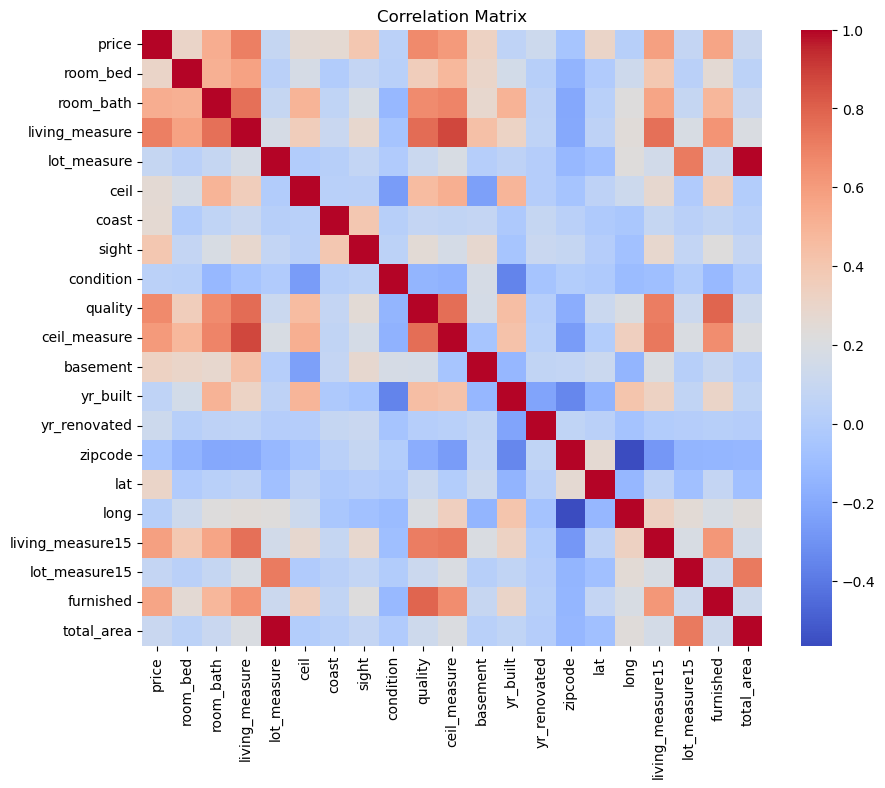

C:\Users\anand\AppData\Local\Temp\ipykernel_3528\279743718.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
price,1.000000,0.307758,0.524090,0.702079,0.089671,0.256368,0.266041,0.396994,0.035539,0.667477,...,0.323825,0.053876,0.126438,-0.053193,0.306900,0.021536,0.583829,0.082592,0.565828,0.104845
room_bed,0.307758,1.000000,0.514261,0.575783,0.032004,0.174102,-0.006082,0.078210,0.027824,0.356031,...,0.301888,0.154153,0.018433,-0.152576,-0.009431,0.129681,0.390004,0.029409,0.258424,0.044443
room_bath,0.524090,0.514261,1.000000,0.752521,0.087583,0.496197,0.061872,0.185857,-0.126499,0.663323,...,0.282468,0.504657,0.050344,-0.203309,0.024828,0.221892,0.565674,0.086667,0.483378,0.103759
living_measure,0.702079,0.575783,0.752521,1.000000,0.172731,0.352713,0.102543,0.284371,-0.058896,0.762498,...,0.434788,0.317756,0.055213,-0.199582,0.052736,0.240061,0.753596,0.183487,0.632447,0.194170
lot_measure,0.089671,0.032004,0.087583,0.172731,1.000000,-0.005417,0.021167,0.074980,-0.008551,0.113826,...,0.015359,0.052942,0.007670,-0.129253,-0.085951,0.228886,0.145003,0.716048,0.119165,0.998169
ceil,0.256368,0.174102,0.496197,0.352713,-0.005417,1.000000,0.024133,0.028933,-0.262145,0.457335,...,-0.244899,0.487227,0.005342,-0.058459,0.050327,0.124891,0.277408,-0.011405,0.347224,0.002357
coast,0.266041,-0.006082,0.061872,0.102543,0.021167,0.024133,1.000000,0.400219,0.017680,0.082513,...,0.079237,-0.025856,0.088357,0.030286,-0.014144,-0.042020,0.086221,0.030727,0.069570,0.023406
sight,0.396994,0.078210,0.185857,0.284371,0.074980,0.028933,0.400219,1.000000,0.046511,0.250861,...,0.277237,-0.052720,0.102977,0.084375,0.005985,-0.078049,0.280911,0.072976,0.219892,0.080996
condition,0.035539,0.027824,-0.126499,-0.058896,-0.008551,-0.262145,0.017680,0.046511,1.000000,-0.144768,...,0.173720,-0.360606,-0.060500,0.003014,-0.015504,-0.106614,-0.093189,-0.002965,-0.122426,-0.009805
quality,0.667477,0.356031,0.663323,0.762498,0.113826,0.457335,0.082513,0.250861,-0.144768,1.000000,...,0.168403,0.446782,0.014417,-0.184854,0.114103,0.198029,0.710827,0.119291,0.788121,0.129849


In [25]:
# Generate a correlation matrix heatmap to visualize the relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Calculate correlation matrix
correlation_matrix = data.corr()
correlation_matrix

Price and Living Measure: There is a strong positive correlation (0.70) between the price of the house and the living area. This suggests that larger homes tend to be more expensive.

Price and Number of Bedrooms: The correlation between price and the number of bedrooms is moderate (0.31). This indicates that while the number of bedrooms does impact the price, it is not as significant as the living area.

Price and Coast Proximity: Houses closer to the coast have a moderately positive correlation (0.27) with higher prices, indicating that coastal properties tend to be more valuable.

Price and Year Built: The correlation between the price and the year the house was built is very low (0.05), suggesting that the age of the house has minimal direct impact on its price.


Other inferences:
There are strong correlations between living_measure and living_measure15, and between lot_measure and lot_measure15, which is expected as these pairs of features represent similar attributes measured at different times.

Price shows a moderate positive correlation with living_measure, quality, and ceil_measure, suggesting that larger and higher quality homes tend to be priced higher.

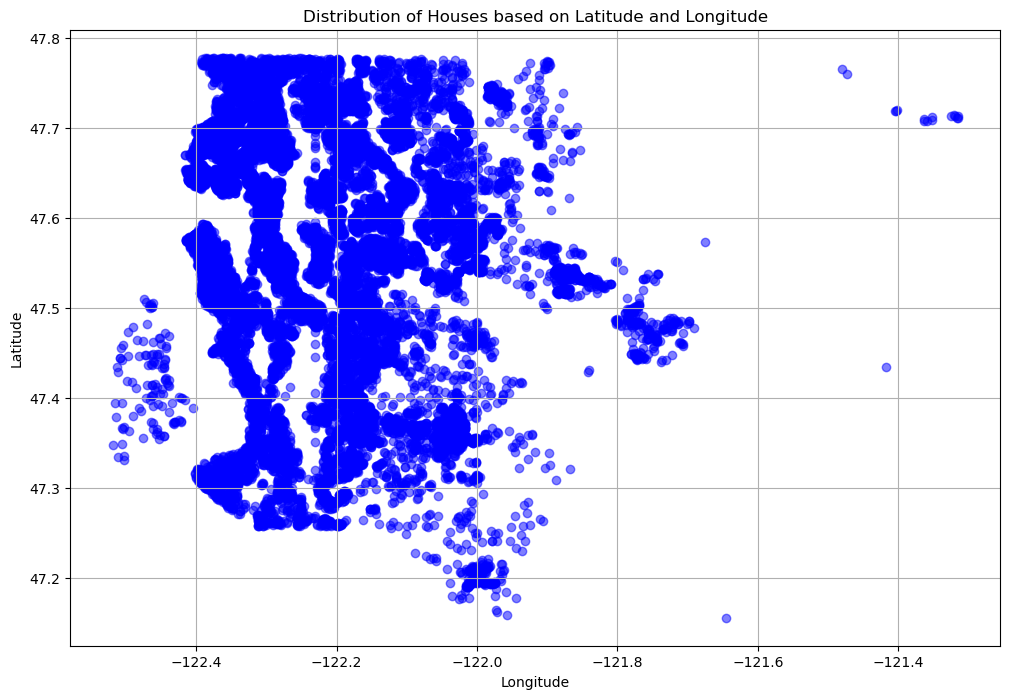

C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2798772389.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


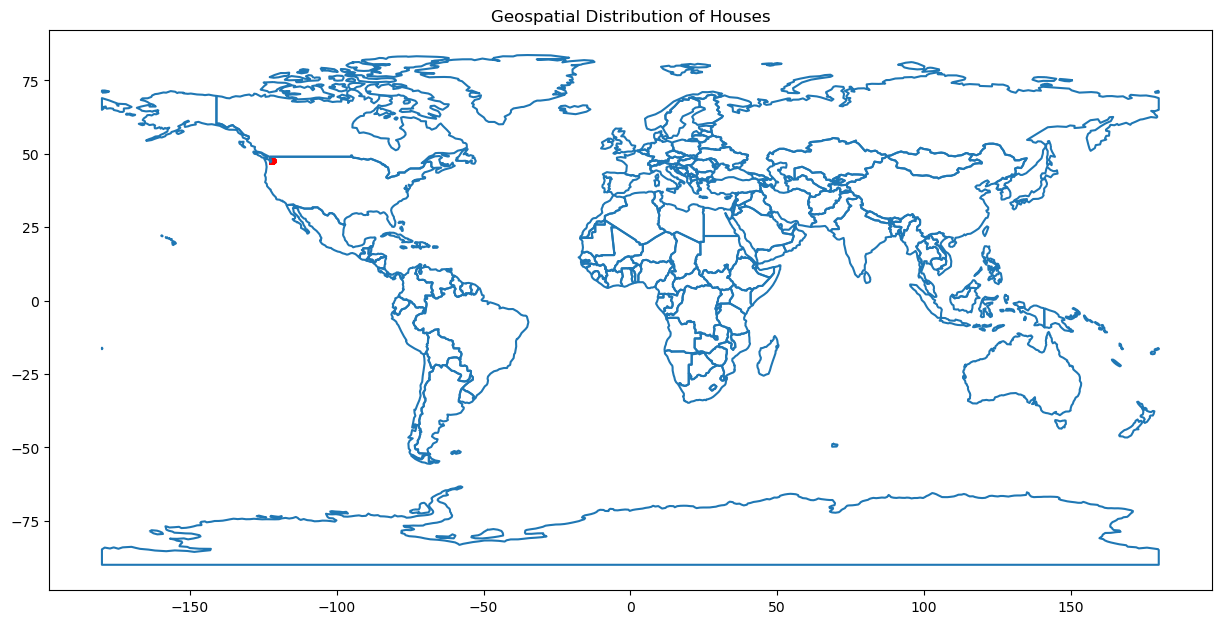

In [26]:
# Visualizing the distribution of houses based on latitude and longitude
plt.figure(figsize=(12, 8))
plt.scatter(data['long'], data['lat'], c='b', marker='o', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Houses based on Latitude and Longitude')
plt.grid(True)
plt.show()

# Create a GeoDataFrame from the latitude and longitude columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['long'], data['lat']))

# Plotting the GeoDataFrame on a map
# Created a geospatial visualization showing the distribution of houses on a map. 
# Each red point represents a house location based on the latitude and longitude data. 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Geospatial Distribution of Houses')
plt.show()

In [27]:
# Feature Engineering1: Creating a new feature based on latitude and longitude
data['distance_from_center'] = ((data['lat'] - data['lat'].mean())**2 + (data['long'] - data['long'].mean())**2)**0.5

The purpose of this feature engineering is to create a new feature, 'distance_from_center', that represents the distance of each data point from a central point, typically the mean latitude and longitude of all data points.

The logic behind this feature engineering is to capture the spatial relationship of each data point relative to the center point. By calculating the Euclidean distance between each data point and the center point, we can potentially identify patterns or clusters based on spatial proximity

CRS set to: epsg:4326


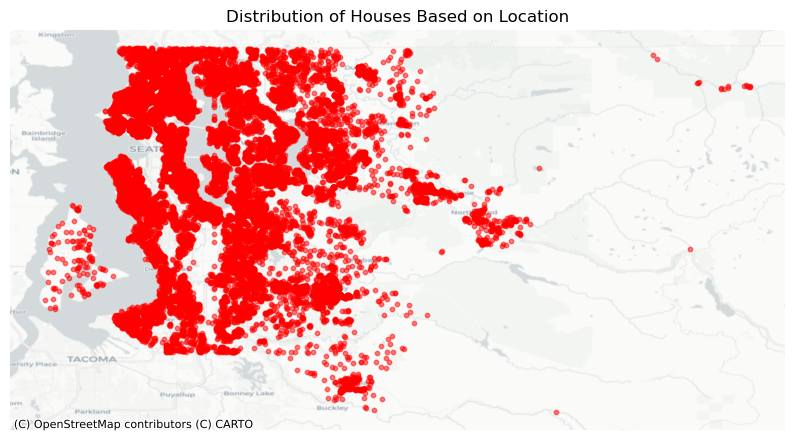

In [28]:
#The Coordinate Reference System (CRS) has been successfully set to EPSG:4326, which is a common geographic coordinate system. 
#Here is the visual representation of the distribution of houses based on their geographical locations:
gdf = gdf.set_crs('epsg:4326')
print('CRS set to:', gdf.crs)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, color='red', markersize=10)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('Distribution of Houses Based on Location')
plt.show()

The visualization of the distribution of houses based on latitude and longitude on a map can provide several insights:

Density and Clustering: Areas with higher concentrations of points indicate regions with higher densities of houses. This can be useful for identifying urban centers or popular residential areas.

Geographical Trends: The distribution might show trends such as houses being concentrated along certain geographical features like rivers, coasts, or within certain political boundaries like city limits.

Outliers: Isolated points could indicate rural houses or special properties that are far from typical residential areas.

Planning and Development: For urban planners and developers, this visualization can help in understanding the spread of development and planning infrastructure or services accordingly.

This map-based distribution is a powerful tool for gaining insights into the geographical aspects of housing data. 

In [29]:
# Feature Engineering2:
# Calculating the age of the house and renovation flag

data['year'] = data['dayhours'].dt.year #Extracting year from 'dayhours'
data['house_age'] = data['year'] - data['yr_built']
data['renovated_flag'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

Purpose of creating above new features is that these might have predictive power for the model.

Age of House: The age of a house can affect its price, as newer homes might command higher prices.

Renovated Flag: Indicates whether the house has been renovated, which can also influence its market value.

In [30]:
#Checking on outliers for updated data using z-scores
# Calculate Z-scores for each numeric column
numeric_df = data.select_dtypes(include=['number'])
z_scores = pd.DataFrame((numeric_df - numeric_df.mean()) / numeric_df.std())

# Define a threshold for outlier detection
threshold = 3  #Since our data is skewed or has heavy tails, using 3 standard deviations is more appropriate.

# Find outliers by checking where Z-score exceeds the threshold
outliers = z_scores.abs() > threshold

# Display rows containing outliers
outliers_data = numeric_df[outliers.any(axis=1)]
#outliers_data.shape
print(outliers_data)
#print(data.columns)
#print(outliers_data.columns)
#print(outliers)

         price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
2       735000       4.0       2.75          3040.0       2415.0   2.0      1   
18      968060       4.0       2.50          2620.0      16200.0   1.0      0   
25      250000       1.0       1.00           720.0     123710.0   1.0      0   
33      675000       4.0       2.50          2920.0       6000.0   2.0      0   
84      733000       3.0       1.75          1740.0       3060.0   1.0      0   
...        ...       ...        ...             ...          ...   ...    ...   
21577  3100000       3.0       3.00          3920.0      13085.0   2.0      1   
21581   549950       3.0       1.75          2930.0     266587.0   2.0      0   
21586   880000       4.0       3.50          2800.0       6750.0   2.0      0   
21589   513000       3.0       2.50          2150.0     161607.0   2.0      0   
21604   960000       5.0       4.00          3720.0      15200.0   2.0      0   

       sight  condition  qu

In [31]:
#Features with strong correlations may be more influential in the analysis and may require closer scrutiny for outliers.
# Extract correlation between the target variable and other variables
correlation_with_target = numeric_df.corr()['price'].drop('price')
print(correlation_with_target)
selectedf_numeric_col_corr = correlation_with_target[correlation_with_target > 0.1]
#selectedf_numeric_col_corr.index
selectedf_numeric_col_corr

room_bed                0.307758
room_bath               0.524090
living_measure          0.702079
lot_measure             0.089671
ceil                    0.256368
coast                   0.266041
sight                   0.396994
condition               0.035539
quality                 0.667477
ceil_measure            0.605593
basement                0.323825
yr_built                0.053876
yr_renovated            0.126438
zipcode                -0.053193
lat                     0.306900
long                    0.021536
living_measure15        0.583829
lot_measure15           0.082592
furnished               0.565828
total_area              0.104845
distance_from_center   -0.247250
year                    0.003536
house_age              -0.053816
renovated_flag          0.126096
Name: price, dtype: float64


room_bed            0.307758
room_bath           0.524090
living_measure      0.702079
ceil                0.256368
coast               0.266041
sight               0.396994
quality             0.667477
ceil_measure        0.605593
basement            0.323825
yr_renovated        0.126438
lat                 0.306900
living_measure15    0.583829
furnished           0.565828
total_area          0.104845
renovated_flag      0.126096
Name: price, dtype: float64

In [32]:
#Outlier treatment of features based on the correlation feature selection
#Considering all the positive correlated features > 0.1 that are
#'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast', 'sight',
#'quality', 'ceil_measure', 'basement', 'yr_renovated', 'lat',
#'living_measure15', 'furnished', 'total_area', 'renovated_flag'
# Outlier Treatment
# Winsorizing - Winsorization involves replacing extreme values with less extreme values. We can replace outliers 
# with either the maximum or minimum non-outlier value in the dataset or replace them with a certain percentile value.
#In this case, it sets the lower and upper limits to 1% of the data. This means that the function will replace the 
#bottom 1% and the top 1% of values in the considered columns with less extreme values.
data['room_bed'] = mstats.winsorize(data['room_bed'], limits=[0.01, 0.01])
data['room_bath'] = mstats.winsorize(data['room_bath'], limits=[0.01, 0.01])
data['living_measure'] = mstats.winsorize(data['living_measure'], limits=[0.01, 0.01])
data['ceil'] = mstats.winsorize(data['ceil'], limits=[0.01, 0.01])
data['coast'] = mstats.winsorize(data['coast'], limits=[0.01, 0.01])
data['sight'] = mstats.winsorize(data['sight'], limits=[0.01, 0.01])
data['quality'] = mstats.winsorize(data['quality'], limits=[0.01, 0.01])
data['ceil_measure'] = mstats.winsorize(data['ceil_measure'], limits=[0.01, 0.01])
data['basement'] = mstats.winsorize(data['basement'], limits=[0.01, 0.01])
data['yr_renovated'] = mstats.winsorize(data['yr_renovated'], limits=[0.01, 0.01])
data['lat'] = mstats.winsorize(data['lat'], limits=[0.01, 0.01])
data['living_measure15'] = mstats.winsorize(data['living_measure15'], limits=[0.01, 0.01])
data['total_area'] = mstats.winsorize(data['total_area'], limits=[0.01, 0.01])
data['furnished'] = mstats.winsorize(data['furnished'], limits=[0.01, 0.01])
data['renovated_flag'] = mstats.winsorize(data['renovated_flag'], limits=[0.01, 0.01])


In [33]:
#Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, 
#which can cause issues such as unstable coefficients estimates and difficulties in interpreting the model.
#VIF stands for Variance Inflation Factor. It is a measure used to quantify the severity of multicollinearity 
#in a regression analysis.
#We first calculate the VIF for each independent variable to identify multicollinearity.
#Then, we identify variables with high VIF(i.e., > 10).A high VIF value (typically greater than 10) indicates that the 
#variance of the coefficient estimate for that variable is inflated due to multicollinearity.
#We remove these variables from the dataset to mitigate multicollinearity.
# Select only numeric columns for VIF calculation
numeric_columns = data.select_dtypes(include='number')
# Drop the target variable if present
independent_variables = numeric_columns.drop(columns=['price'])
# Add a constant term to the independent variables
independent_variables_with_const = add_constant(independent_variables)
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = independent_variables_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(independent_variables_with_const.values, i) 
                   for i in range(independent_variables_with_const.shape[1])]
print(vif_data.transpose())
# Identify variables with high VIF
high_vif_variables = vif_data[1:][vif_data['VIF'] > 10]['Variable']
# Remove variables with high VIF
df_filtered = data.drop(columns=high_vif_variables)
df_filtered

C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    0         1          2               3            4   \
Variable         const  room_bed  room_bath  living_measure  lot_measure   
VIF       23397183.393  1.764445    3.33566      154.318888     3.976959   

                5      6         7          8         9   ...       15  \
Variable      ceil  coast     sight  condition   quality  ...      lat   
VIF       2.047137    NaN  1.233146   1.258284  4.915598  ...  1.22185   

                16                17             18         19          20  \
Variable      long  living_measure15  lot_measure15  furnished  total_area   
VIF       2.023492           3.06764       2.636356   2.914445    5.169417   

                            21    22         23              24  
Variable  distance_from_center  year  house_age  renovated_flag  
VIF                   1.330735   inf        inf    18656.991793  

[2 rows x 25 columns]


C:\Users\anand\AppData\Local\Temp\ipykernel_3528\3983861725.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_vif_variables = vif_data[1:][vif_data['VIF'] > 10]['Variable']


,dayhours,price,room_bed,room_bath,lot_measure,ceil,coast,sight,condition,quality,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,distance_from_center
0,2015-04-27,600000,4.0,1.75,9440.0,1.0,0,0.0,3,8.0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490,0.165642
1,2015-03-17,190000,2.0,1.00,3101.0,1.0,0,0.0,4,6.0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771,0.060377
2,2014-08-20,735000,4.0,2.75,2415.0,2.0,0,4.0,3,8.0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455,0.058969
3,2014-10-10,257000,3.0,2.50,3721.0,2.0,0,0.0,3,8.0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461,0.223761
4,2015-02-18,450000,2.0,1.00,4590.0,1.0,0,0.0,3,7.0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710,0.071403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2015-03-10,685530,4.0,2.50,60467.0,2.0,0,0.0,3,9.0,98014,47.6618,-121.962,2780.0,44224.0,1.0,63597,0.271642
21609,2014-05-21,535000,2.0,1.00,4841.0,1.0,0,0.0,3,7.0,98103,47.6860,-122.341,1530.0,4944.0,0.0,5871,0.178950
21610,2014-09-05,998000,3.0,3.75,34412.0,2.0,0,0.0,3,10.0,98075,47.5888,-122.040,2390.0,34412.0,1.0,38122,0.176229
21611,2015-02-06,262000,4.0,2.50,7800.0,2.0,0,0.0,3,7.0,98168,47.5140,-122.316,1160.0,7800.0,0.0,9360,0.112036


In [35]:
df_filtered['dayhours'] = df_filtered['dayhours'].astype('int64')  # Convert datetime to numeric
# Split the data into training and testing sets
X = df_filtered
y = data['price']
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#The adjusted R-squared score is a measure of how well the independent variables explain the variation in the dependent variable.
#It's adjusted based on the number of predictors in the model to provide a more accurate assessment of the model's goodness of fit.

#Here's how it works:
#1. Calculate the predicted values of the dependent variable using the model.
#2. Compute the R-squared score, which represents the proportion of the variance in the dependent variable that's explained by the independent variables.
#3. Adjust the R-squared score based on the number of predictors and the sample size. This adjustment penalizes the score if additional predictors don't significantly improve the model's fit.
#
#The adjusted R-squared score formula is:
#Adjusted R2 = 1 - ((1 - R2) * (n - 1))/(n - p - 1)
#Where:
#- R2 is the R-squared score
#- n is the number of samples
#- p is the number of predictors
#
#This adjusted score gives a more reliable indication of the model's performance, especially when comparing models with different numbers of predictors.
#Since we dont have an inbuilt library, lets make a relevant method.
def adj_r2(estimator, X, y_true):
    n, p = X.shape
    pred = estimator.predict(X)
    return 1 - ((1 - r2_score(y_true, pred)) * (n - 1))/(n-p-1)

# Calculate other metrics
# Setup multiple scorers
#In scikit-learn, many scoring functions are negated when used in model selection utilities 
#like GridSearchCV because these utilities aim to maximize the score, 
#so higher numbers are better. For metrics where a lower number is better, like MSE or RMSE, 
#scikit-learn will return the negative of the metric. This is why you see negative values for MSE and RMSE.

#To interpret these scores, you simply take the absolute value. 
#For example, if GridSearchCV returns a score of -0.01 for neg_mean_squared_error, the actual MSE is 0.01
scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2',
    'Adj R2': adj_r2
}

# Setting up the parameter grid
param_grid = [
    {'regressor': [LinearRegression()]},
    {'regressor': [Ridge()], 'regressor__alpha': [0.1, 1.0, 10.0]},
    {'regressor': [Lasso()], 'regressor__alpha': [0.1, 1.0, 10.0]},
    {'regressor': [RandomForestRegressor()], 'regressor__n_estimators': [100, 200], 'regressor__max_features': ['auto', 'sqrt']},
    {'regressor': [GradientBoostingRegressor()], 'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.05, 0.1]},
    {'regressor': [SVR()], 'regressor__kernel': ['linear', 'rbf'], 'regressor__C': [1, 10]},
    {'regressor': [XGBRegressor()], 'regressor__n_estimators': [100, 200],'regressor__max_depth': [3, 6, 9],'regressor__learning_rate': [0.01, 0.1], 'regressor__subsample': [0.8, 1], 'regressor__colsample_bytree': [0.8, 1]}
]

# Setup the pipeline
pipe = Pipeline([
    ('regressor', LinearRegression())
])

# Grid search with cross-validation using multiple scorers
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=3, scoring=scoring, refit='Adj R2', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#If refit is set to False, GridSearchCV will not refit the best estimator on the entire dataset, 
# and best_estimator_ will not be available.

# Best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Construct a detailed description of the best model
model_details = f"{best_model.named_steps['regressor'].__class__.__name__}, {best_params}"

# Predicting the train and test sets
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)



Fitting 5 folds for each of 67 candidates, totalling 335 fits
[CV 1/5] END regressor=LinearRegression(); Adj R2: (train=1.000, test=1.000) MAE: (train=-0.000, test=-0.000) MSE: (train=-0.000, test=-0.000) R2: (train=1.000, test=1.000) RMSE: (train=-0.000, test=-0.000) total time=   0.0s
[CV 2/5] END regressor=LinearRegression(); Adj R2: (train=1.000, test=1.000) MAE: (train=-0.000, test=-0.000) MSE: (train=-0.000, test=-0.000) R2: (train=1.000, test=1.000) RMSE: (train=-0.000, test=-0.000) total time=   0.0s
[CV 3/5] END regressor=LinearRegression(); Adj R2: (train=1.000, test=1.000) MAE: (train=-0.000, test=-0.000) MSE: (train=-0.000, test=-0.000) R2: (train=1.000, test=1.000) RMSE: (train=-0.000, test=-0.000) total time=   0.0s
[CV 4/5] END regressor=LinearRegression(); Adj R2: (train=1.000, test=1.000) MAE: (train=-0.000, test=-0.000) MSE: (train=-0.000, test=-0.000) R2: (train=1.000, test=1.000) RMSE: (train=-0.000, test=-0.000) total time=   0.0s
[CV 5/5] END regressor=LinearRegre

C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=100; Adj R2: (train=1.000, test=1.000) MAE: (train=-197.025, test=-397.583) MSE: (train=-50155347.104, test=-46671483.727) R2: (train=1.000, test=1.000) RMSE: (train=-7082.044, test=-6831.653) total time=  29.5s


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=100; Adj R2: (train=1.000, test=0.971) MAE: (train=-140.135, test=-2405.118) MSE: (train=-20202413.014, test=-5007439831.682) R2: (train=1.000, test=0.971) RMSE: (train=-4494.709, test=-70763.266) total time=  29.2s


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=100; Adj R2: (train=1.000, test=1.000) MAE: (train=-198.263, test=-261.682) MSE: (train=-53699339.409, test=-15414592.278) R2: (train=1.000, test=1.000) RMSE: (train=-7327.983, test=-3926.142) total time=  29.3s


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=100; Adj R2: (train=1.000, test=1.000) MAE: (train=-211.179, test=-194.859) MSE: (train=-56162798.533, test=-3223666.701) R2: (train=1.000, test=1.000) RMSE: (train=-7494.184, test=-1795.457) total time=  29.1s


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=100; Adj R2: (train=1.000, test=1.000) MAE: (train=-192.223, test=-193.292) MSE: (train=-46950297.053, test=-3702606.615) R2: (train=1.000, test=1.000) RMSE: (train=-6852.029, test=-1924.216) total time=  29.1s


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=200; Adj R2: (train=1.000, test=1.000) MAE: (train=-201.229, test=-347.223) MSE: (train=-46420918.039, test=-24052314.753) R2: (train=1.000, test=1.000) RMSE: (train=-6813.290, test=-4904.316) total time=  58.1s


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=200; Adj R2: (train=1.000, test=0.970) MAE: (train=-126.967, test=-2424.170) MSE: (train=-18405651.964, test=-5142318819.423) R2: (train=1.000, test=0.970) RMSE: (train=-4290.181, test=-71709.963) total time=11.5min


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=200; Adj R2: (train=1.000, test=1.000) MAE: (train=-205.853, test=-283.364) MSE: (train=-55310443.982, test=-21304454.900) R2: (train=1.000, test=1.000) RMSE: (train=-7437.099, test=-4615.675) total time=  58.7s


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=200; Adj R2: (train=1.000, test=1.000) MAE: (train=-214.298, test=-193.398) MSE: (train=-67404787.589, test=-3219703.763) R2: (train=1.000, test=1.000) RMSE: (train=-8210.042, test=-1794.353) total time=  58.1s


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END regressor=RandomForestRegressor(), regressor__max_features=auto, regressor__n_estimators=200; Adj R2: (train=1.000, test=1.000) MAE: (train=-191.212, test=-184.960) MSE: (train=-50845331.334, test=-2835377.818) R2: (train=1.000, test=1.000) RMSE: (train=-7130.591, test=-1683.858) total time=  58.5s
[CV 1/5] END regressor=RandomForestRegressor(), regressor__max_features=sqrt, regressor__n_estimators=100; Adj R2: (train=0.995, test=0.985) MAE: (train=-7258.968, test=-17265.839) MSE: (train=-636117990.714, test=-2093296495.359) R2: (train=0.995, test=0.985) RMSE: (train=-25221.380, test=-45752.557) total time=  10.9s
[CV 2/5] END regressor=RandomForestRegressor(), regressor__max_features=sqrt, regressor__n_estimators=100; Adj R2: (train=0.998, test=0.924) MAE: (train=-6567.975, test=-20765.833) MSE: (train=-320783640.026, test=-12938834649.215) R2: (train=0.998, test=0.925) RMSE: (train=-17910.434, test=-113748.998) total time=  10.9s
[CV 3/5] END regressor=RandomForestRegres

[CV 1/5] END regressor=GradientBoostingRegressor(), regressor__learning_rate=0.1, regressor__n_estimators=200; Adj R2: (train=1.000, test=1.000) MAE: (train=-1943.969, test=-2131.045) MSE: (train=-7928236.138, test=-21178121.953) R2: (train=1.000, test=1.000) RMSE: (train=-2815.712, test=-4601.969) total time=  20.0s
[CV 2/5] END regressor=GradientBoostingRegressor(), regressor__learning_rate=0.1, regressor__n_estimators=200; Adj R2: (train=1.000, test=0.980) MAE: (train=-1859.155, test=-3752.022) MSE: (train=-7160337.265, test=-3482413310.773) R2: (train=1.000, test=0.980) RMSE: (train=-2675.881, test=-59011.976) total time=  20.1s
[CV 3/5] END regressor=GradientBoostingRegressor(), regressor__learning_rate=0.1, regressor__n_estimators=200; Adj R2: (train=1.000, test=1.000) MAE: (train=-1979.196, test=-2165.751) MSE: (train=-8464177.523, test=-12132590.007) R2: (train=1.000, test=1.000) RMSE: (train=-2909.326, test=-3483.187) total time=  20.0s
[CV 4/5] END regressor=GradientBoostingR

[CV 2/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=0.8; Adj R2: (train=0.817, test=0.732) MAE: (train=-95164.005, test=-102332.146) MSE: (trai

[CV 5/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.804, test=0.825) MAE: (train=-97591.819, test=-93609.494) MSE: (train=-

[CV 3/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200, regressor__subsample=1; Adj R2: (train=0.944, test=0.952) MAE: (train=-43284.668, test=-43316.313) MSE: (train=-

[CV 1/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=6, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.833, test=0.841) MAE: (train=-91481.298, test=-92853.875) MSE: (train=-

[CV 4/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=6, regressor__n_estimators=200, regressor__subsample=0.8; Adj R2: (train=0.965, test=0.970) MAE: (train=-37698.200, test=-37140.926) MSE: (train

[CV 2/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=100, regressor__subsample=0.8; Adj R2: (train=0.842, test=0.751) MAE: (train=-89058.808, test=-96629.621) MSE: (train

[CV 5/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.839, test=0.843) MAE: (train=-91492.320, test=-88100.676) MSE: (train=-

[CV 3/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=200, regressor__subsample=1; Adj R2: (train=0.971, test=0.956) MAE: (train=-35705.340, test=-37515.925) MSE: (train=-

[CV 1/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.990, test=0.990) MAE: (train=-10819.672, test=-11915.449) MSE: (train=-1

[CV 4/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__n_estimators=200, regressor__subsample=0.8; Adj R2: (train=0.997, test=0.993) MAE: (train=-7277.947, test=-8231.964) MSE: (train=-3

[CV 2/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.1, regressor__max_depth=6, regressor__n_estimators=100, regressor__subsample=0.8; Adj R2: (train=0.999, test=0.949) MAE: (train=-5203.089, test=-11637.337) MSE: (train=-

[CV 5/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.1, regressor__max_depth=6, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.999, test=0.988) MAE: (train=-5232.282, test=-8476.426) MSE: (train=-965

[CV 3/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.1, regressor__max_depth=6, regressor__n_estimators=200, regressor__subsample=1; Adj R2: (train=1.000, test=0.989) MAE: (train=-3090.291, test=-6842.430) MSE: (train=-287

[CV 1/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.1, regressor__max_depth=9, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=1.000, test=0.990) MAE: (train=-2646.441, test=-9846.093) MSE: (train=-134

[CV 4/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=0.8, regressor__learning_rate=0.1, regressor__max_depth=9, regressor__n_estimators=200, regressor__subsample=0.8; Adj R2: (train=1.000, test=0.992) MAE: (train=-1509.036, test=-8682.658) MSE: (train=-4

[CV 2/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=0.8; Adj R2: (train=0.844, test=0.757) MAE: (train=-87831.839, test=-94744.247) MSE: (train=-

[CV 5/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.830, test=0.855) MAE: (train=-89965.824, test=-85549.412) MSE: (train=-24

[CV 3/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200, regressor__subsample=1; Adj R2: (train=0.956, test=0.966) MAE: (train=-34212.784, test=-34036.315) MSE: (train=-61

[CV 1/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.01, regressor__max_depth=6, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.849, test=0.859) MAE: (train=-86495.941, test=-87420.910) MSE: (train=-20

[CV 4/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.01, regressor__max_depth=6, regressor__n_estimators=200, regressor__subsample=0.8; Adj R2: (train=0.972, test=0.980) MAE: (train=-32398.351, test=-31087.573) MSE: (train=-

[CV 2/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=100, regressor__subsample=0.8; Adj R2: (train=0.854, test=0.766) MAE: (train=-85724.178, test=-92353.769) MSE: (train=-

[CV 5/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.850, test=0.859) MAE: (train=-87969.640, test=-83985.478) MSE: (train=-21

[CV 3/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=200, regressor__subsample=1; Adj R2: (train=0.975, test=0.964) MAE: (train=-32288.250, test=-32685.686) MSE: (train=-35

[CV 1/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=0.995, test=0.992) MAE: (train=-5233.043, test=-6316.961) MSE: (train=-71680

[CV 4/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__n_estimators=200, regressor__subsample=0.8; Adj R2: (train=0.999, test=0.992) MAE: (train=-4242.366, test=-5641.449) MSE: (train=-162

[CV 2/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.1, regressor__max_depth=6, regressor__n_estimators=100, regressor__subsample=0.8; Adj R2: (train=1.000, test=0.957) MAE: (train=-1902.594, test=-6961.767) MSE: (train=-266

[CV 5/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.1, regressor__max_depth=6, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=1.000, test=0.991) MAE: (train=-2032.492, test=-4140.318) MSE: (train=-31295

[CV 3/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.1, regressor__max_depth=6, regressor__n_estimators=200, regressor__subsample=1; Adj R2: (train=1.000, test=0.988) MAE: (train=-1438.056, test=-4081.044) MSE: (train=-78350

[CV 1/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.1, regressor__max_depth=9, regressor__n_estimators=100, regressor__subsample=1; Adj R2: (train=1.000, test=0.991) MAE: (train=-1172.048, test=-4918.626) MSE: (train=-40333

[CV 4/5] END regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), regressor__colsample_bytree=1, regressor__learning_rate=0.1, regressor__max_depth=9, regressor__n_estimators=200, regressor__subsample=0.8; Adj R2: (train=1.000, test=0.993) MAE: (train=-709.590, test=-4258.948) MSE: (train=-9350

In [36]:
#grid_search.cv_results_

In [43]:
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None)

# Get all parameter combinations
param_combinations = grid_search.cv_results_['params']

# Get validation scores
val_scores = grid_search.cv_results_

# Create a DataFrame for train and test results
train_results_ft = pd.DataFrame(columns=['Model', 'Hyperparameters', 'TrainFT_MSE', 'TrainFT_MAE', 'TrainFT_RMSE', 'TrainFT_R2 Score', 'TrainFT_Adj R2'])
test_results_ft = pd.DataFrame(columns=['Model', 'Hyperparameters', 'TestFT_MSE', 'TestFT_MAE', 'TestFT_RMSE', 'TestFT_R2 Score', 'TestFT_Adj R2'])

for i, params in enumerate(param_combinations):
    # Extract model name
    model_name = grid_search.cv_results_['param_regressor'][i].__class__.__name__
    
    # Extract hyperparameters
    hyperparameters = {key.replace("regressor__", ""): value for key, value in params.items()}
    
    # Extract validation scores
    # To interpret these scores, taking the absolute value for mse,mae and rmse as it was calculated as negative under grid_search
    mse_train = abs(val_scores['mean_train_MSE'][i])
    mae_train = abs(val_scores['mean_train_MAE'][i])
    rmse_train = abs(val_scores['mean_train_RMSE'][i])
    r2_train = val_scores['mean_train_R2'][i]
    adj_r2_train = val_scores['mean_train_Adj R2'][i]
    
    mse_test = abs(val_scores['mean_test_MSE'][i])
    mae_test = abs(val_scores['mean_test_MAE'][i])
    rmse_test = abs(val_scores['mean_test_RMSE'][i])
    r2_test = val_scores['mean_test_R2'][i]
    adj_r2_test = val_scores['mean_test_Adj R2'][i]
    
    # Add to train results dataframe
    train_results_ft = train_results_ft.append({
        'Model': model_name,
        'Hyperparameters': hyperparameters,
        'TrainFT_MSE': mse_train,
        'TrainFT_MAE': mae_train,
        'TrainFT_RMSE': rmse_train,
        'TrainFT_R2 Score': r2_train,
        'TrainFT_Adj R2': adj_r2_train
    }, ignore_index=True)
    
    # Add to test results dataframe
    test_results_ft = test_results_ft.append({
        'Model': model_name,
        'Hyperparameters': hyperparameters,
        'TestFT_MSE': mse_test,
        'TestFT_MAE': mae_test,
        'TestFT_RMSE': rmse_test,
        'TestFT_R2 Score': r2_test,
        'TestFT_Adj R2': adj_r2_test
    }, ignore_index=True)

# Display train results
#print("Train Results:")
#print(train_results)
#
## Display test results
#print("\nTest Results:")
#print(test_results)


C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2532874555.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_ft = train_results_ft.append({
C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2532874555.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_ft = test_results_ft.append({
C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2532874555.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_ft = train_results_ft.append({
C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2532874555.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_ft = test_results_ft.append({
C:\Users\anand\A

C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2532874555.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_ft = train_results_ft.append({
C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2532874555.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_ft = test_results_ft.append({
C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2532874555.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_ft = train_results_ft.append({
C:\Users\anand\AppData\Local\Temp\ipykernel_3528\2532874555.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_ft = test_results_ft.append({
C:\Users\anand\A

In [44]:
train_results_ft.to_csv('train_results_ft.csv', index = False)
train_results_ft

,Model,Hyperparameters,TrainFT_MSE,TrainFT_MAE,TrainFT_RMSE,TrainFT_R2 Score,TrainFT_Adj R2
0,LinearRegression,{'regressor': LinearRegression()},1.568813e-19,2.786197e-10,3.940268e-10,1.000000,1.000000
1,Ridge,"{'regressor': Ridge(), 'alpha': 0.1}",1.854277e+01,2.597648e+00,4.304297e+00,1.000000,1.000000
2,Ridge,"{'regressor': Ridge(), 'alpha': 1.0}",1.853476e+03,2.597046e+01,4.303369e+01,1.000000,1.000000
3,Ridge,"{'regressor': Ridge(), 'alpha': 10.0}",1.845498e+05,2.591039e+02,4.294113e+02,0.999999,0.999999
4,Lasso,"{'regressor': Lasso(), 'alpha': 0.1}",4.229371e+02,1.095114e+01,1.635792e+01,1.000000,1.000000
5,Lasso,"{'regressor': Lasso(), 'alpha': 1.0}",3.270175e+02,9.221400e+00,1.406674e+01,1.000000,1.000000
6,Lasso,"{'regressor': Lasso(), 'alpha': 10.0}",9.212969e+01,6.201333e+00,9.575570e+00,1.000000,1.000000
7,RandomForestRegressor,"{'regressor': RandomForestRegressor(), 'max_features': 'auto', 'n_estimators': 100}",4.543404e+07,1.877650e+02,6.650190e+03,0.999671,0.999671
8,RandomForestRegressor,"{'regressor': RandomForestRegressor(), 'max_features': 'auto', 'n_estimators': 200}",4.767743e+07,1.879118e+02,6.776241e+03,0.999656,0.999655
9,RandomForestRegressor,"{'regressor': RandomForestRegressor(), 'max_features': 'sqrt', 'n_estimators': 100}",5.162843e+08,7.248286e+03,2.257872e+04,0.996248,0.996243


In [50]:
test_results_ft.to_csv('test_results_ft.csv', index = False)
test_results_ft

,Model,Hyperparameters,TestFT_MSE,TestFT_MAE,TestFT_RMSE,TestFT_R2 Score,TestFT_Adj R2
0,LinearRegression,{'regressor': LinearRegression()},1.547290e-19,2.793537e-10,3.906441e-10,1.000000,1.000000
1,Ridge,"{'regressor': Ridge(), 'alpha': 0.1}",1.928225e+01,2.606348e+00,4.328328e+00,1.000000,1.000000
2,Ridge,"{'regressor': Ridge(), 'alpha': 1.0}",1.927378e+03,2.605743e+01,4.327386e+01,1.000000,1.000000
3,Ridge,"{'regressor': Ridge(), 'alpha': 10.0}",1.918935e+05,2.599706e+02,4.317990e+02,0.999999,0.999999
4,Lasso,"{'regressor': Lasso(), 'alpha': 0.1}",3.818011e+02,1.082910e+01,1.569841e+01,1.000000,1.000000
5,Lasso,"{'regressor': Lasso(), 'alpha': 1.0}",2.960399e+02,9.097041e+00,1.340554e+01,1.000000,1.000000
6,Lasso,"{'regressor': Lasso(), 'alpha': 10.0}",9.399945e+01,6.208165e+00,9.609532e+00,1.000000,1.000000
7,RandomForestRegressor,"{'regressor': RandomForestRegressor(), 'max_features': 'auto', 'n_estimators': 100}",1.015290e+09,6.905067e+02,1.704815e+04,0.994056,0.994025
8,RandomForestRegressor,"{'regressor': RandomForestRegressor(), 'max_features': 'auto', 'n_estimators': 200}",1.038746e+09,6.866230e+02,1.694163e+04,0.993922,0.993890
9,RandomForestRegressor,"{'regressor': RandomForestRegressor(), 'max_features': 'sqrt', 'n_estimators': 100}",4.520161e+09,1.824403e+04,6.163522e+04,0.969826,0.969668


In [65]:
best_model

Pipeline(steps=[('regressor', LinearRegression())])

Let's compare the training and testing performance metrics for the Linear Regression model.

### Training Metrics:
- **TrainFT_MSE (Mean Squared Error)**: This is the average of the squared differences between the actual and predicted values in the training set. In this case, the MSE is approximately 1.57E-19, which indicates very low error between the actual and predicted values.
  
- **TrainFT_MAE (Mean Absolute Error)**: It is the average of the absolute differences between the actual and predicted values in the training set. The MAE is approximately 2.79E-10, indicating a very small average absolute difference between the actual and predicted values.
  
- **TrainFT_RMSE (Root Mean Squared Error)**: RMSE is the square root of the MSE, representing the square root of the average squared differences between the actual and predicted values in the training set. The RMSE is approximately 3.94E-10, which is extremely low, indicating very accurate predictions.
  
- **TrainFT_R2 Score (R-squared)**: This score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A score of 1.0 indicates a perfect fit. Here, the R-squared score is 1.0, meaning the model perfectly predicts the dependent variable based on the independent variables.
  
- **TrainFT_Adj R2 (Adjusted R-squared)**: Adjusted R-squared penalizes excessive complexity in the model. A score of 1.0 indicates a perfect fit without excessive complexity. The Adjusted R-squared score is also 1.0, indicating a perfect fit with no excessive complexity.

### Testing Metrics:
- **TestFT_MSE**: Similar to TrainFT_MSE but calculated on the testing set. It represents the average of the squared differences between the actual and predicted values in the testing set. Here, it is 1.55E-19, indicating very low error.
  
- **TestFT_MAE**: Similar to TrainFT_MAE but calculated on the testing set. It represents the average of the absolute differences between the actual and predicted values in the testing set. It is approximately 2.79E-10, showing very small average absolute differences.
  
- **TestFT_RMSE**: Similar to TrainFT_RMSE but calculated on the testing set. It represents the square root of the average squared differences between the actual and predicted values in the testing set. It is approximately 3.91E-10, indicating very accurate predictions.
  
- **TestFT_R2 Score**: Similar to TrainFT_R2 Score but calculated on the testing set. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A score of 1.0 indicates a perfect fit. Here, it is 1.0, meaning the model perfectly predicts the dependent variable based on the independent variables.
  
- **TestFT_Adj R2**: Similar to TrainFT_Adj R2 but calculated on the testing set. It adjusts the R-squared score for the number of predictors in the model. Here, it is also 1.0, indicating a perfect fit without excessive complexity.

In [64]:
# Save predictions of the best model to a CSV file
predictions = best_model.predict(X_test)
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions})
predictions_df.to_csv('best_model_price_predictions_ft.csv', index=False)

C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [55]:
#Based on same train and test data,checking which model works best without any fine tuning.

#Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "SVR":SVR(),
    "XGBRegressor":XGBRegressor()
}

 
# Train and evaluate models on train data
train_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    mae_train1 = mean_absolute_error(y_train, y_pred_train)
    mse_train1 = mean_squared_error(y_train, y_pred_train)
    rmse_train1 = np.sqrt(mse_train1)
    r2_train1 = r2_score(y_train, y_pred_train)
    adj_r2_train1 =adj_r2(model, X_train, y_train) 
    train_results[name] = {"TrainWFT_MSE": mse_train1, "TrainWFT_MAE": mae_train1, "TrainWFT_RMSE": rmse_train1, "TrainWFT_R2": r2_train1, "TrainWFT_Adj R2":adj_r2_train1}

# Create DataFrame from results1 dictionary
train_results_df = pd.DataFrame(train_results).T.reset_index()
train_results_df.columns = ["Model", "TrainWFT_MSE", "TrainWFT_MAE", "TrainWFT_RMSE", "TrainWFT_R2", "TrainWFT_Adj R2"]

# Display validation metrics for test data without hyperparameter tuning
print("Validation Metrics for test data without hyperparameter tuning:")
print(train_results_df)
    
    
# Train and evaluate models
results1 = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_test)
    mae1 = mean_absolute_error(y_test, y_pred1)
    mse1 = mean_squared_error(y_test, y_pred1)
    rmse1 = np.sqrt(mse1)
    r2_1 = r2_score(y_test, y_pred1)
    adj_r2_1 =adj_r2(model, X_test, y_test) 
    results1[name] = {"TestWFT_MSE": mse1, "TestWFT_MAE": mae1, "TestWFT_RMSE": rmse1, "TestWFT_R2": r2_1, "TestWFT_Adj R2":adj_r2_1}
    


# Create DataFrame from results1 dictionary
test_results_df = pd.DataFrame(results1).T.reset_index()
test_results_df.columns = ["Model", "TestWFT_MSE", "TestWFT_MAE", "TestWFT_RMSE", "TestWFT_R2", "TestWFT_Adj R2"]

# Display validation metrics for test data without hyperparameter tuning
print("Validation Metrics for test data without hyperparameter tuning:")
print(test_results_df)


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.0768e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Validation Metrics for test data without hyperparameter tuning:
                       Model  TrainWFT_MSE  TrainWFT_MAE  TrainWFT_RMSE  \
0          Linear Regression  1.460950e-12  9.114336e-07   1.208698e-06   
1           Ridge Regression  9.597714e-20  1.926881e-10   3.098018e-10   
2           Lasso Regression  1.727239e-01  1.090692e-01   4.156007e-01   
3    Random Forest Regressor  5.384011e+07  1.795152e+02   7.337582e+03   
4  GradientBoostingRegressor  1.257464e+07  2.336694e+03   3.546074e+03   
5                        SVR  1.455633e+11  2.231717e+05   3.815275e+05   
6               XGBRegressor  4.328796e+06  1.335495e+03   2.080576e+03   

   TrainWFT_R2  TrainWFT_Adj R2  
0     1.000000         1.000000  
1     1.000000         1.000000  
2     1.000000         1.000000  
3     0.999607         0.999607  
4     0.999908         0.999908  
5    -0.061867        -0.062974  
6     0.999968         0.999968  


C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.0768e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Validation Metrics for test data without hyperparameter tuning:
                       Model   TestWFT_MSE   TestWFT_MAE  TestWFT_RMSE  \
0          Linear Regression  1.443912e-12  9.031559e-07  1.201629e-06   
1           Ridge Regression  8.730817e-20  1.867950e-10  2.954796e-10   
2           Lasso Regression  1.156959e-01  1.041470e-01  3.401410e-01   
3    Random Forest Regressor  1.788590e+08  4.045689e+02  1.337382e+04   
4  GradientBoostingRegressor  2.865514e+07  2.474464e+03  5.353050e+03   
5                        SVR  1.331862e+11  2.168896e+05  3.649468e+05   
6               XGBRegressor  2.952573e+09  4.649197e+03  5.433758e+04   

   TestWFT_R2  TestWFT_Adj R2  
0    1.000000        1.000000  
1    1.000000        1.000000  
2    1.000000        1.000000  
3    0.998585        0.998579  
4    0.999773        0.999772  
5   -0.053985       -0.058393  
6    0.976634        0.976537  


In [56]:
train_results_df

,Model,TrainWFT_MSE,TrainWFT_MAE,TrainWFT_RMSE,TrainWFT_R2,TrainWFT_Adj R2
0,Linear Regression,1.460950e-12,9.114336e-07,1.208698e-06,1.000000,1.000000
1,Ridge Regression,9.597714e-20,1.926881e-10,3.098018e-10,1.000000,1.000000
2,Lasso Regression,1.727239e-01,1.090692e-01,4.156007e-01,1.000000,1.000000
3,Random Forest Regressor,5.384011e+07,1.795152e+02,7.337582e+03,0.999607,0.999607
4,GradientBoostingRegressor,1.257464e+07,2.336694e+03,3.546074e+03,0.999908,0.999908
5,SVR,1.455633e+11,2.231717e+05,3.815275e+05,-0.061867,-0.062974
6,XGBRegressor,4.328796e+06,1.335495e+03,2.080576e+03,0.999968,0.999968


In [59]:
#Higher value(~1 or 1) of R2 or Adj R2, better is the model
best_model_name_train_wft = max(train_results, key=lambda x: train_results[x]['TrainWFT_Adj R2'])
best_model_results_train_wft = train_results[best_model_name_train_wft]
best_model_instance_train_wft = models[best_model_name_train_wft]
best_model_instance_train_wft

LinearRegression()

In [60]:
test_results_df

,Model,TestWFT_MSE,TestWFT_MAE,TestWFT_RMSE,TestWFT_R2,TestWFT_Adj R2
0,Linear Regression,1.443912e-12,9.031559e-07,1.201629e-06,1.000000,1.000000
1,Ridge Regression,8.730817e-20,1.867950e-10,2.954796e-10,1.000000,1.000000
2,Lasso Regression,1.156959e-01,1.041470e-01,3.401410e-01,1.000000,1.000000
3,Random Forest Regressor,1.788590e+08,4.045689e+02,1.337382e+04,0.998585,0.998579
4,GradientBoostingRegressor,2.865514e+07,2.474464e+03,5.353050e+03,0.999773,0.999772
5,SVR,1.331862e+11,2.168896e+05,3.649468e+05,-0.053985,-0.058393
6,XGBRegressor,2.952573e+09,4.649197e+03,5.433758e+04,0.976634,0.976537


In [61]:
best_model_name = max(results1, key=lambda x: results1[x]['TestWFT_Adj R2'])
best_model_results = results1[best_model_name]
best_model_instance = models[best_model_name]

In [62]:
best_model_instance

LinearRegression()

In [63]:
## Save predictions of the best model to a CSV file
predictions_wft = best_model_instance.predict(X_test)
predictions_wft_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions_wft})
predictions_wft_df.to_csv('best_model_price_predictions_wft.csv', index=False)

The comparison of training and testing performance metrics for the Linear Regression model indicates that the model performs extremely well on both the training and testing data be it with or without fine tuning. These great results were achievable because we dealt with outliers and multicolinearity. Here are the key conclusions:

1. **Low Error**: The mean squared error (MSE) and root mean squared error (RMSE) for both training and testing data are extremely low, indicating very small differences between the actual and predicted values. This suggests that the model is accurately capturing the patterns in the data.

2. **Similarity between Training and Testing**: The metrics for the testing set are very close to those of the training set, indicating that the model generalizes well to unseen data. This suggests that the model is not overfitting the training data.

3. **Perfect R-squared Scores**: Both the R-squared and adjusted R-squared scores are 1.0 for both training and testing sets. This indicates that the model explains 100% of the variance in the target variable, which is an exceptional performance.

4. **Conclusion**: Based on these observations, we can conclude that the Linear Regression model is an excellent fit for the data and is likely to perform well in making predictions on new, unseen data. However, it's always good practice to validate the model's performance on a separate validation dataset or using cross-validation to ensure robustness.